<a href="https://colab.research.google.com/github/Touseeq99/ML_MODELS_SCRATCH/blob/main/Ridge_Regression_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
df = pd.DataFrame(data['data'] , columns = data['feature_names'])
df.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204


In [7]:
df['target'] = data['target']
df.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0


In [8]:
X = df.drop('target' , axis=1)
y = df['target']

In [9]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
lr.predict(X_test)

array([226.51848598, 157.46329293,  89.86172648, 207.92043638,
       175.27464325, 146.48196423, 131.11782081,  97.37923306,
       102.94499199, 181.69238112, 237.97531281, 134.74726724,
       189.44205531,  59.92873145, 179.98730177, 117.78561801,
       120.30969646, 126.66229732, 165.19425279, 147.78162151,
       145.4387221 , 124.41329425,  51.96058948, 227.75415791,
       218.10133602, 129.82865712, 160.13538356, 201.17200936,
       184.84143661,  68.90970369, 237.00685674,  58.17158783,
       154.39979192, 119.15941043, 234.0319742 , 172.80143208,
       139.94775146, 169.99263492, 214.59145267, 220.47784209,
       128.98250674, 186.20992149, 162.87053192, 179.77640803,
       107.76869146, 249.52929292, 140.92355113,  32.74846723,
       177.96181001, 145.76575416, 291.96774118, 125.71074727,
       107.27012754, 156.10001536, 115.93096259, 160.35263722,
       229.48001183, 173.38808746, 159.87971544, 123.05044568,
        88.54923021, 122.87202843, 169.12811086, 101.97

In [12]:
y_pred.shape

(89,)

In [13]:
y_test.shape

(89,)

In [14]:
from sklearn.metrics import r2_score,mean_squared_error
Rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print(r2_score(y_test,y_pred))
print(f'Rmse : {Rmse}')

0.5188113124539249
Rmse : 48.72713760953253


In [24]:
from sklearn.linear_model import Ridge
r = Ridge(alpha=10)
r.fit(X_train,y_train)
r.predict(X_test)


array([166.73575296, 158.96319965, 138.04914947, 160.49952299,
       160.34131998, 151.21750124, 148.28015707, 139.30184486,
       140.97715409, 161.19040812, 172.17869326, 145.19483862,
       160.95314398, 137.04564995, 157.38568437, 146.01993968,
       146.24387562, 152.52142313, 155.38871037, 150.37875656,
       141.93620892, 152.86518164, 137.8149709 , 173.05954808,
       172.49577691, 145.15314276, 162.41529709, 159.56835186,
       156.95352158, 136.95577847, 166.70049063, 134.57251874,
       151.15849753, 144.82065879, 163.65657119, 154.62332563,
       149.66681314, 160.06231988, 164.76704677, 169.32537772,
       146.78615182, 159.78522008, 151.70791917, 155.60434524,
       143.02038656, 172.57259172, 149.49457806, 134.10939553,
       158.29695465, 145.46028639, 171.31763309, 144.08992535,
       147.00126389, 147.20481588, 142.99339469, 156.86482133,
       171.6051354 , 165.85577285, 149.45466374, 138.83651005,
       136.32576614, 156.47298546, 151.40590968, 136.02

In [88]:
print(y1_pred.shape)
print(y_test.shape)

(89,)
(89,)


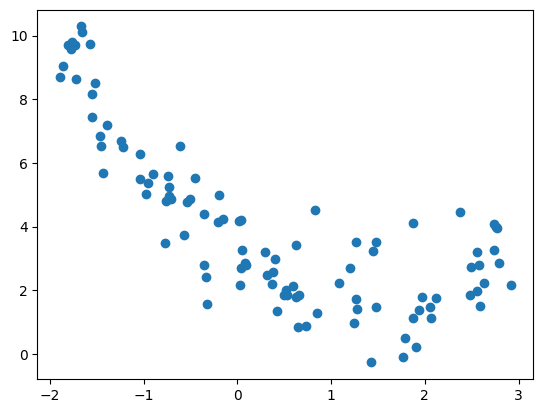

In [27]:

m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

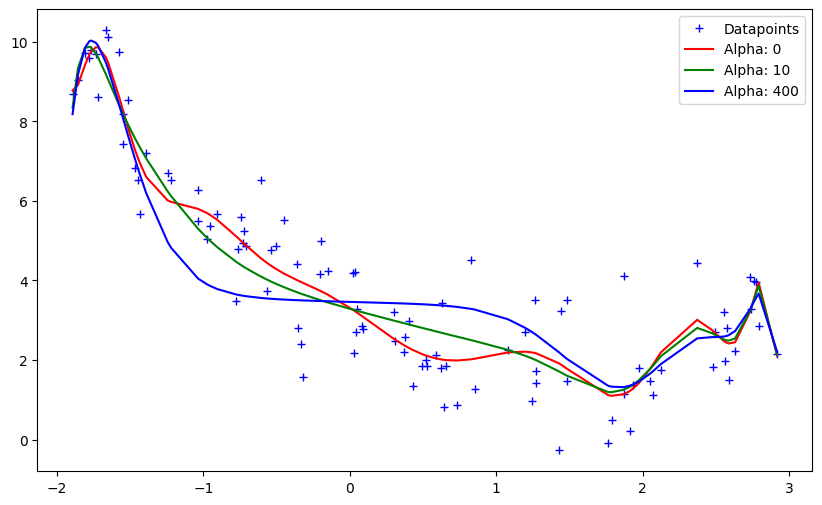

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 10, 400]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [50]:
X_test.shape[0]

89

In [16]:
X = data.data
y = data.target
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

**Coding Ridge Regression From Scratch**

In [17]:

class Ridge_Regression:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):  # Loop through the number of samples
            num += (y_train[i] - np.mean(y_train)) * (X_train[i] - np.mean(X_train))
            den += (X_train[i] - np.mean(X_train)*X_train[i] - np.mean(X_train))
        self.coef_ = num / (den + self.alpha)
        self.intercept_ = np.mean(y_train) - self.coef_ * np.mean(X_train)

    def predict(self, X_test):
        return self.coef_ * X_test + self.intercept_


We have Created Ridge Regression gor 2d Data

Ridge Regression For N Dimensional Data

In [6]:
class MultiRidge:
  def __init__(self,alpha=0.1):
    self.alpha = alpha
    self.coef_ =None
    self.intercept_ = None
  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)
    I = np.identity(X_train.shape[1])
    result = np.dot(np.linalg.inv(np.dot(X_train.T , X_train) + self.alpha*I),np.dot(X_train.T,y_train))
    self.intercept_ = result[0]
    self.coef_ = result[1:]
  def predict(self,X_test):
    return np.dot(X_test,self.coef_) + self.intercept_